In [17]:
import sys
sys.path.append("..")
from dataset import get_loader
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [18]:
def get_sum_label(list_sample):
    loader = get_loader(annotation=list_sample, data_type='train',batch_size=1, num_workers=0, augment=False, prop_tp=1)
    sum_label = np.zeros(24)
    for sound, target in (loader):
        sum_label += target[0][1:].numpy()
    return sum_label

def get_folds():
    tp = pd.read_csv('/home/cybercore/oldhome/datasets/rain_forest/train_tp.csv')
    # get all file names
    all_list = set()
    for row in tp.iterrows():
        all_list.add(row[1]['recording_id'])
    all_list = list(all_list)

    # split to folds
    random.shuffle(all_list)
    return all_list[0:226], all_list[226:452], all_list[452:678], all_list[678:904], all_list[904:1132]

def write_annotation(fold, train_list, val_list):
    train_ann = open('/home/cybercore/nam/rainforest/fold_lsep/' + str(fold) + '/train_list.txt', 'w')
    val_ann = open('/home/cybercore/nam/rainforest/fold_lsep/' + str(fold) + '/val_list.txt', 'w')

    for filename in train_list:
        train_ann.write(filename + '\n')

    for filename in val_list:
        val_ann.write(filename + '\n')

    train_ann.close()
    val_ann.close()


In [19]:
best_split = None
min_std = 10

for i in tqdm(range(1000)):
    # split
    list1, list2, list3, list4, list5 = get_folds()

    # get labels
    try:
        fold1 = get_sum_label(list1)
        fold2 = get_sum_label(list2)
        fold3 = get_sum_label(list3)
        fold4 = get_sum_label(list4)
        fold5 = get_sum_label(list5)
    except:
        continue
    
    # calculate std
    total = np.ones(5)
    total[0] = fold1.std()
    total[1] = fold2.std()
    total[2] = fold3.std()
    total[3] = fold4.std()
    total[4] = fold5.std()
    total_std = total.std()
    if total_std <= min_std:
        min_std = total_std
        best_split = list1, list2, list3, list4, list5 
        write_annotation(fold=1, train_list=list2 + list3 + list4 + list5, val_list = list1)
        write_annotation(fold=2, train_list=list1 + list3 + list4 + list5, val_list = list2)
        write_annotation(fold=3, train_list=list1 + list2 + list4 + list5, val_list = list3)
        write_annotation(fold=4, train_list=list1 + list2 + list3 + list5, val_list = list4)
        write_annotation(fold=5, train_list=list1 + list2 + list3 + list4, val_list = list5)
        print('updated annotation with std: %f'% total_std)

KeyboardInterrupt: 

In [10]:
fold1 = get_sum_label('/home/cybercore/nam/rainforest/fold/1/val_list.txt')
fold2 = get_sum_label('/home/cybercore/nam/rainforest/fold/2/val_list.txt')
fold3 = get_sum_label('/home/cybercore/nam/rainforest/fold/3/val_list.txt')
fold4 = get_sum_label('/home/cybercore/nam/rainforest/fold/4/val_list.txt')
fold5 = get_sum_label('/home/cybercore/nam/rainforest/fold/5/val_list.txt')

(0.0, 35.0)

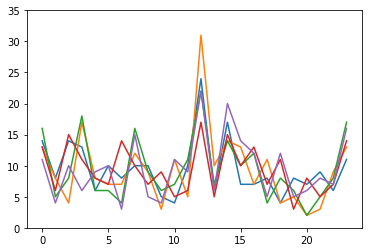

In [16]:
plt.plot(fold1)
plt.plot(fold2)
plt.plot(fold3)
plt.plot(fold4)
plt.plot(fold5)
plt.ylim([0, 35])

In [13]:
total = np.ones(5)
total[0] = fold1.std()
total[1] = fold2.std()
total[2] = fold3.std()
total[3] = fold4.std()
total[4] = fold5.std()
total.std()

0.7238357068810625